In [1]:
# Import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('../Data/df_cleaned')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

#  Explotory Analysis

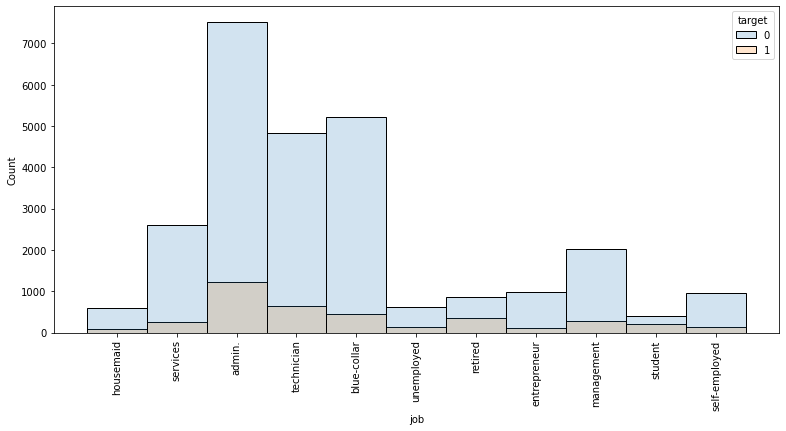

In [11]:
plt.figure(figsize=(13,6))
sns.histplot(x='job',data=df,hue='target',alpha=.2)
plt.xticks(rotation=90);
plt.savefig('../Plot/job vs target')

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30488.0,39.030012,10.333529,17.000,31.000,37.000,45.000,95.000
duration,30488.0,259.484092,261.714262,0.000,103.000,181.000,321.000,4918.000
campaign,30488.0,2.521451,2.720150,1.000,1.000,2.000,3.000,43.000
pdays,30488.0,956.332295,201.373292,0.000,999.000,999.000,999.000,999.000
previous,30488.0,0.194273,0.522788,0.000,0.000,0.000,0.000,7.000
emp.var.rate,30488.0,-0.071510,1.610399,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,30488.0,93.523311,0.585374,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,30488.0,-40.602263,4.789249,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30488.0,3.459938,1.777231,0.634,1.313,4.856,4.961,5.045
nr.employed,30488.0,5160.813409,75.158065,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
# Group by the data base on the labels to see the continuous features distribution
df.groupby('target').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
target,,,,,,,,,,
0,38.838334,220.277555,2.593113,981.438282,0.148898,0.115690,93.552002,-40.714638,3.673637,5171.234293
1,40.352682,530.028505,2.026950,783.088624,0.507385,-1.363281,93.325331,-39.826820,1.985306,5088.904172


<Figure size 2400x1600 with 0 Axes>

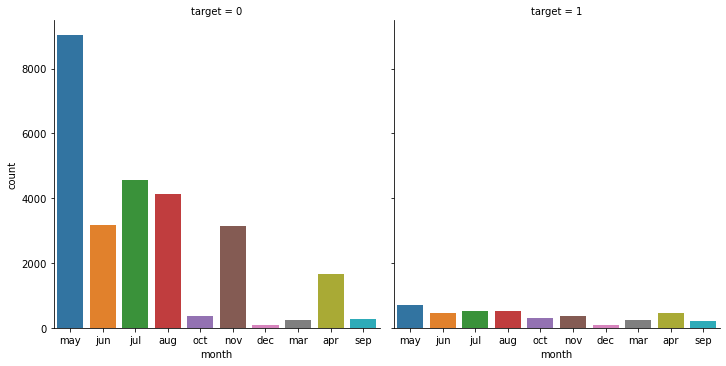

In [66]:
# As we see the months distribution vs labels are completely different 
plt.figure(dpi=400)
sns.catplot(x='month',data=df,col='target',kind="count",height=5)
plt.savefig('../Plot/month vs target')

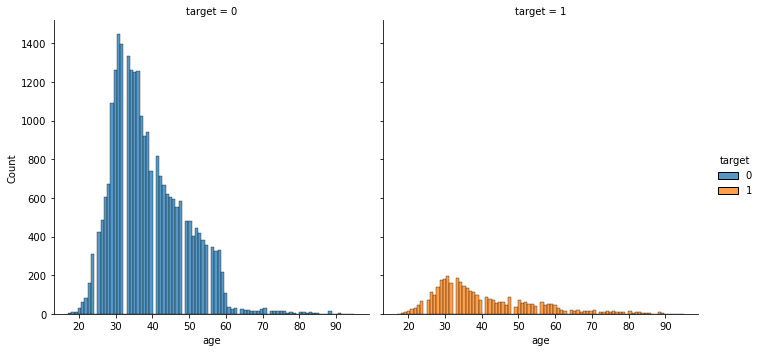

In [71]:
sns.displot(x='age',data=df,hue='target',col='target',height=5)
plt.savefig('../Plot/age vs target')

In [9]:
df.corr()['target'].sort_values(ascending=False)[1:]

duration          0.393530
previous          0.228003
cons.conf.idx     0.061638
age               0.048727
campaign         -0.069206
cons.price.idx   -0.128752
emp.var.rate     -0.305365
euribor3m        -0.315869
pdays            -0.327509
nr.employed      -0.364230
Name: target, dtype: float64

In [10]:
df['marital'].value_counts()

married     17492
single       9443
divorced     3553
Name: marital, dtype: int64

In [11]:
df['poutcome'].value_counts()

nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

In [12]:
df['previous'].value_counts()

0    25836
1     3752
2      633
3      190
4       56
5       16
6        4
7        1
Name: previous, dtype: int64

In [92]:
# Convert the object data to the values
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [96]:
# check the feature correlation between feature and target
corr = df_dummy.corr()['target'].sort_values(ascending=False)[1:]
corr

duration                         0.393530
poutcome_success                 0.319874
previous                         0.228003
month_mar                        0.146298
month_oct                        0.141358
month_sep                        0.124378
job_retired                      0.102376
job_student                      0.088617
month_dec                        0.074600
cons.conf.idx                    0.061638
age                              0.048727
education_university.degree      0.046619
marital_single                   0.042191
job_unemployed                   0.020917
day_of_week_thu                  0.016853
housing_yes                      0.010071
day_of_week_tue                  0.008771
education_illiterate             0.008351
day_of_week_wed                  0.008305
job_housemaid                   -0.000223
month_jun                       -0.001660
job_management                  -0.002428
education_professional.course   -0.002525
job_self-employed               -0

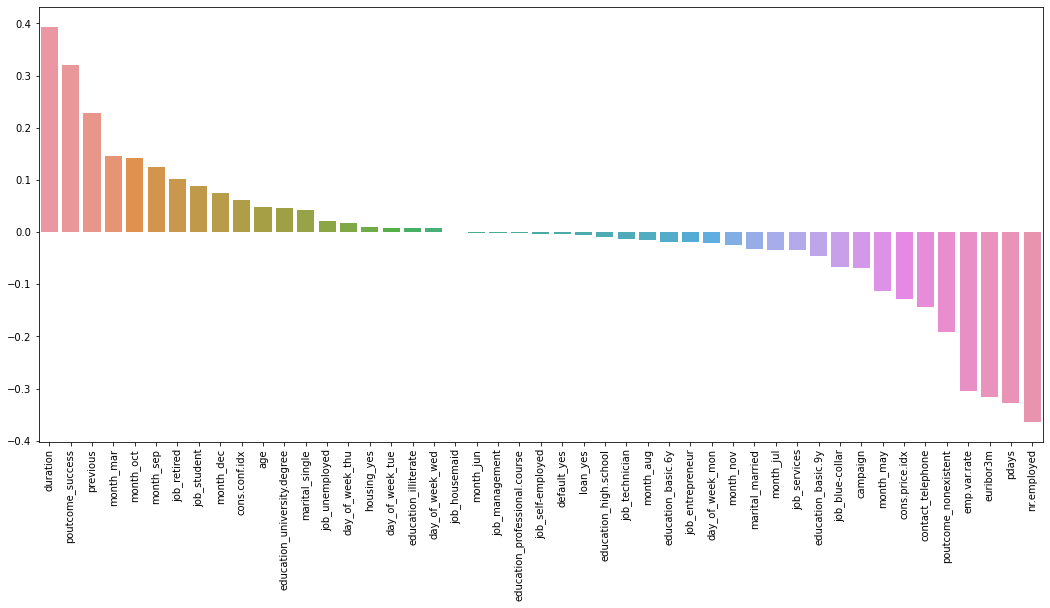

In [97]:
plt.figure(figsize=(18,8))
sns.barplot(x=corr.index,y=corr.values)
plt.xticks(rotation=90);
plt.savefig('../Plot/target corr')

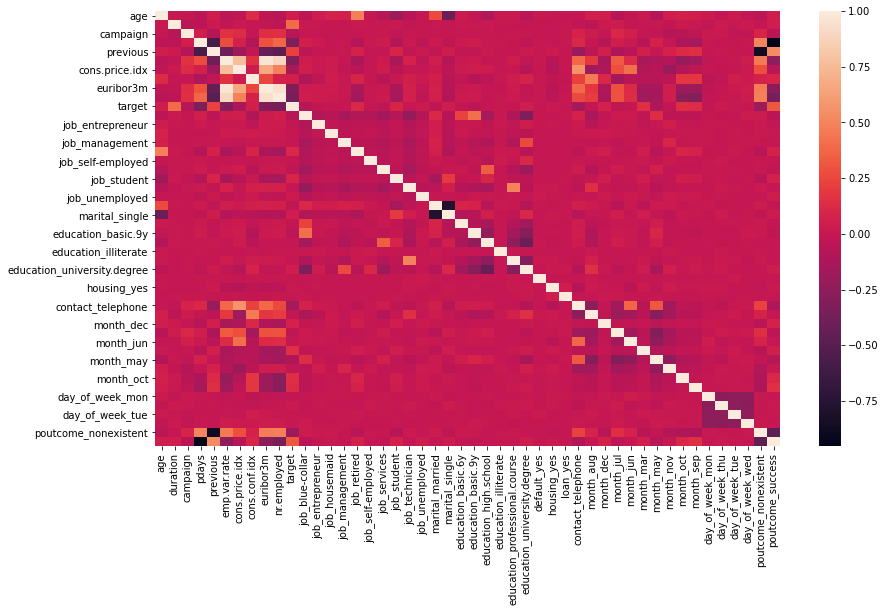

In [106]:
plt.figure(figsize=(14,8))
sns.heatmap(df_dummy.corr())
plt.savefig('../Plot/corr heatmap')